In [16]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [17]:
def find_z_score(probability):
    """
    Function to find the z-score corresponding to a given probability in a standard normal distribution.
    
    Parameters:
        probability (float): The probability for which you want to find the z-score.
        
    Returns:
        z_score (float): The z-score corresponding to the given probability.
    """
    z_score = st.norm.ppf((1 + probability) / 2) # adjusting for two-tailed distribution
    
    return z_score

In [18]:
#PROPORTION ANALYSIS
confidence_level = .95

# Minimum detectable effect for practical significance (the smaller the effect, 
# the harder to detect therefore a larger sample size is required.)
d_min = 0.02

#Control Parameters
n_cont = 179619
x_cont = 3682
prob_cont = x_cont/n_cont

print("prob control = ", prob_cont)

#Experiment Parameters
n_trt = 179201
x_trt = 3736
prob_trt = x_trt/n_trt

print("prob treatment = ", prob_trt)

#Pooled Results
prob_pooled = (x_cont + x_trt) / (n_cont + n_trt)
se_pooled = np.sqrt(prob_pooled * (1-prob_pooled) * (1/n_cont + 1/n_trt))

print(se_pooled)

#Difference in Means
d_hat = prob_trt - prob_cont

print("diff", d_hat)

#Margin of error
m = find_z_score(confidence_level) * se_pooled

#Confidence Bounds
lb = d_hat - m
ub = d_hat + m

confidence_interval = [lb,ub]

prob control =  0.02049894498911585
prob treatment =  0.020848097945881997
0.00047507355550416796
diff 0.00034915295676614735


In [19]:
def stretch_numbers(num1, num2, n):
    """
    Stretch two numbers into a list of n elements by linear interpolation.
    """
    if n <= 2:
        raise ValueError("n should be greater than 2 for stretching")

    step = (num2 - num1) / (n - 1)  # Calculate the step size for linear interpolation
    stretched_list = [num1 + i * step for i in range(n)]  # Linearly interpolate between num1 and num2
    return stretched_list

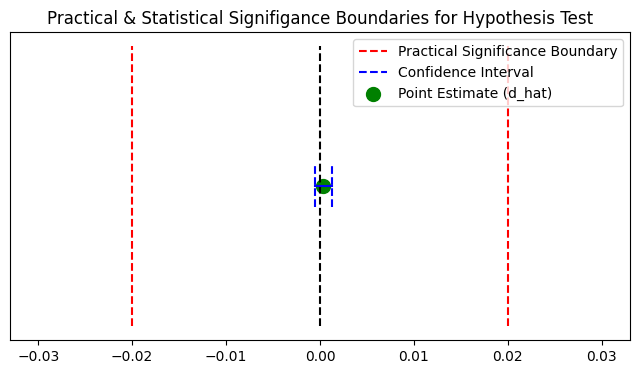

In [20]:
x = stretch_numbers(-d_min*1.50, d_min*1.50, 5)
y = [1,1,1,1,1]

x_dmin = list([d_min])*5
y1 = [0,1,2,3,4]

x_neg_dmin = list([-d_min])*5
y1 = [0,1,2,3,4]

plt.figure(figsize=(8,4))

plt.plot(x, y, color = 'white')
plt.plot(stretch_numbers(0,0,5), stretch_numbers(0,4,5), color = 'black', linestyle='--')
plt.plot(x_dmin, y1, color ='red',  linestyle='--')
plt.plot(x_neg_dmin, y1, color ='red',  linestyle='--', label = 'Practical Significance Boundary')

plt.plot(stretch_numbers(lb,ub,5), stretch_numbers(2,2,5), color ='blue',  linestyle='-')
plt.plot(stretch_numbers(lb,lb,5), stretch_numbers(2*.85,2*1.15,5), color ='blue',  linestyle='--')
plt.plot(stretch_numbers(ub,ub,5), stretch_numbers(2*.85,2*1.15,5), color ='blue',  linestyle='--', label ='Confidence Interval')

#Adding Point Estimate for 
plt.scatter(d_hat, 2, color='green', s=100, label='Point Estimate (d_hat)')

# Hide y-axis ticks
plt.yticks([]) 

plt.title("Practical & Statistical Signifigance Boundaries for Hypothesis Test")
# Adding legend
plt.legend(loc='upper right')

plt.show()